# Automate Value Machine  

AVM or Automated value machines are algorithms used to value houses based off of area, size, selldate and more. 
They are often used in mass valuations and are more accurate than human appraisors. The following AVM makes use house prices alone, and shows how machin learning can be used to plot value considerations for the end user. 

In [57]:
import csv
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy

Importing housing price and area data to build a statistical model, find the average area for each house in the global data set. 

In [58]:
target_directory = r'C:\GitHub\Land-value-GIS\backups'

HOUSEDATA = "house_price_and_area.csv"

path = os.path.join(target_directory, HOUSEDATA)

listformatted = []

x = []
y = []

with open(path, "r") as r:
    reader = csv.reader(r)
    for row in reader:
        if len(row)> 1:
            listformatted.append(row)

for sublist in listformatted:
    sublist[0] = int(sublist[0])
    sublist[1] = int(sublist[1])
    x.append(sublist[0])
    y.append(sublist[1])

#dataframe = pd.read_csv(path, header=None)

X = numpy.array(x)
Y = numpy.array(y)

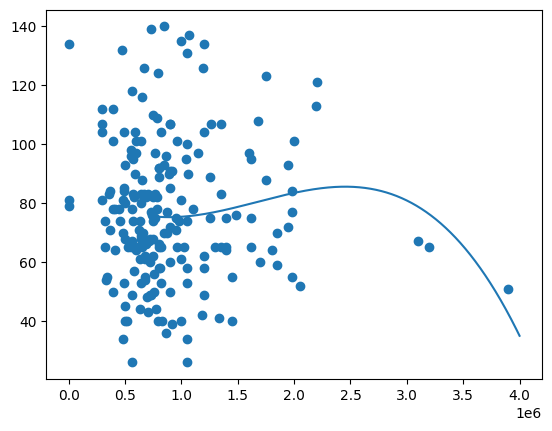

In [67]:
mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))
myline = numpy.linspace(800000, 4000000, 6000000)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()

The following packages are used to data clean, organize and compute. CSV is used to open files commonly used in excel, oS is for use of the operating system, Matplot and Pandas are 2 data science modules that help with large data manipulation. 

In [60]:
locations_price_paths = [
    "prop_westerncape_locations_price.csv",
    "prop_eastern_cape_locations_price.csv",
    "prop_freestate_locations_price.csv",
    "prop_gauteng_locations_price.csv",
    "prop_kwazulu_natal_locations_price.csv",
    "prop_limpopo_locations_price.csv",
    "prop_mpumalanga_locations_price.csv",
    "prop_northern_cape_locations_price.csv",
    "prop_northwest_locations_price.csv"
]

target_directory = r'C:\GitHub\Land-value-GIS\backups'

pricelist = []

for file in locations_price_paths:
    full = os.path.join(target_directory, file)
    with open(full, "r") as r:
        reader = csv.reader(r)
        for row in reader:
            if len(row) > 1:
                pricelist.append(row)
    break

for pair in pricelist:
    pair.remove(pair[1])

pricelist = [int(price) for sublist in pricelist for price in sublist]   

for number in pricelist:
    if number == 0:
        pricelist.remove(number)

pricelist.sort()

def removeOs():
    for number in pricelist:
        if number == 0:
            pricelist.remove(number)
        elif number > 9999999:
            pricelist.remove(number)
        elif number < 400000:
            pricelist.remove(number)

for i in range(20):
    removeOs()

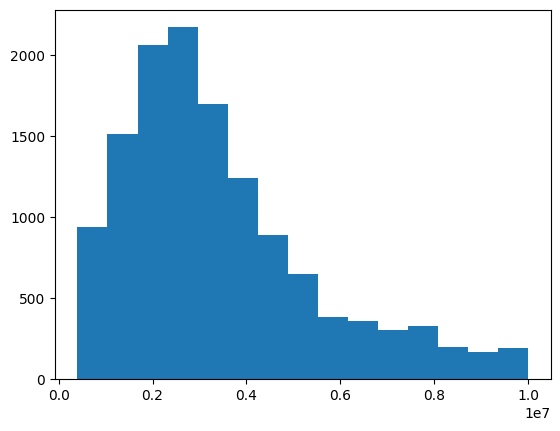

In [61]:
plt.hist(pricelist, 15)
plt.show()